<a href="https://colab.research.google.com/github/ykato27/Auto-Encorder/blob/main/Deep_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Autoencoder

In [1]:
!pip install pycodestyle flake8 pycodestyle_magic

In [2]:
%load_ext pycodestyle_magic

In [3]:
import numpy as np
from keras import regularizers
from keras.datasets import mnist
from keras.layers import Dense, Input
from keras.models import Model

In [4]:
encoding_dim = 32
input_img = Input(shape=(784,))

encoded = Dense(128, activation="relu")(input_img)
encoded = Dense(64, activation="relu")(encoded)
encoded = Dense(32, activation="relu")(encoded)

decoded = Dense(64, activation="relu")(encoded)
decoded = Dense(128, activation="relu")(decoded)
decoded = Dense(784, activation="sigmoid")(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [5]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               101136

In [6]:
import numpy as np
from keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test),
)

Epoch 1/50
235/235 [==============================] - 16s 13ms/step - loss: 0.3503 - val_loss: 0.1671
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1569 - val_loss: 0.1358
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1341 - val_loss: 0.1250
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1243 - val_loss: 0.1171
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1174 - val_loss: 0.1121
Epoch 6/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1127 - val_loss: 0.1094
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1099 - val_loss: 0.1067
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1074 - val_loss: 0.1042
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1049 - val_loss: 0.1026
Epoch 10/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1033 - val_l

In [8]:
import matplotlib.pyplot as plt

# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

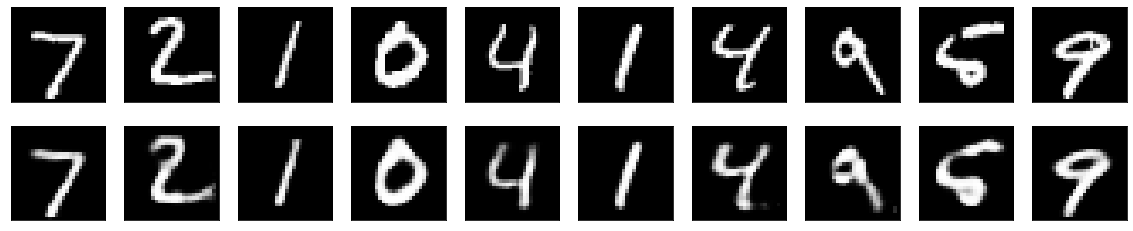

In [9]:
# 何個表示するか
# plt.subplot(行数, 列数, 何番目のプロットか)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)  # 軸の値の表示を無効化
    ax.get_yaxis().set_visible(False)  # 軸の値の表示を無効化
plt.show()